In [1]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
path=os.path.dirname(os.path.abspath("__file__"))
print(path)

/home/root_admin/Aniket_sROI_UK_EPL_Weekly_2020-2021/Aniket Practice/Lending Club Case Study


In [11]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

In [71]:
def missingValuesCheck(x):
    l = []
    for i in x.columns:
        l.append(x[i].isnull().sum())

    missing = pd.DataFrame()
    missing['columns'] = x.columns
    missing['missing'] = l
    missing['pct_missing'] = round((missing.missing / x.shape[0])*100,2)
    missing = missing[missing.missing!=0]

    return missing

In [281]:
def percentileChecks(df, feature):
    df[feature] = df[feature].astype('float')
    for i in range(0,101,1):
        print(i, " Percentile = ", df[feature].quantile(i/100))

In [370]:
def defaultPct(col):

    data = df5[col].value_counts().reset_index()
    data.columns = [col, 'TOTAL']

    data2 = df5[df5.LOAN_STATUS=='Charged Off'][col].value_counts().reset_index()
    data2.columns = [col, 'DEFAULTER']

    f_data = data.merge(data2, on=col, how='inner')
    f_data['DEFAULTER_PCT'] = round((f_data.DEFAULTER / f_data.TOTAL)*100,2)
    return pd.DataFrame(f_data)

In [2]:
#Load the dataset
df = pd.read_csv(path+'/loan.csv')
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
# Standardizing the column names by removing any unnecessary special characters and spaces and converting them to upper case

df.columns = df.columns.str.rstrip()
df.columns = df.columns.str.lstrip()
df.columns = df.columns.str.upper()

spec_chars = ["!", '"', "#", "%", "&", "'", "(",")",
                 "*", "+", ",", "-", ".", "/", ":", ";", 
                 "<", "=", ">", "?", "@", "[", "\\", "]", 
                 "^", "`", "{", "|", "}", "~", "–"]
for char in spec_chars:
    df.columns = df.columns.str.replace(char, '')

In [9]:
df.head()

,ID,MEMBER_ID,LOAN_AMNT,FUNDED_AMNT,FUNDED_AMNT_INV,TERM,INT_RATE,INSTALLMENT,GRADE,SUB_GRADE,...,NUM_TL_90G_DPD_24M,NUM_TL_OP_PAST_12M,PCT_TL_NVR_DLQ,PERCENT_BC_GT_75,PUB_REC_BANKRUPTCIES,TAX_LIENS,TOT_HI_CRED_LIM,TOTAL_BAL_EX_MORT,TOTAL_BC_LIMIT,TOTAL_IL_HIGH_CREDIT_LIMIT
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [111]:
df.LOAN_STATUS.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: LOAN_STATUS, dtype: int64

In [112]:
""" Removing all the rows that have 'LOAN_STATUS' as 'Current' as they are still paying back the loan and 
    we cannot say if they will default or not 
"""

df = df[df.LOAN_STATUS!='Current']

In [113]:
df.LOAN_STATUS.value_counts()

Fully Paid     32950
Charged Off     5627
Name: LOAN_STATUS, dtype: int64

# Missing Value Treatment

In [114]:
mv_df = missingValuesCheck(df)
mv_df.head()

,columns,missing,pct_missing
10,EMP_TITLE,2386,6.19
11,EMP_LENGTH,1033,2.68
19,DESC,12527,32.47
21,TITLE,11,0.03
28,MTHS_SINCE_LAST_DELINQ,24905,64.56


In [429]:
mv_df.sort_values('pct_missing', ascending=False)

,columns,missing,pct_missing
76,BC_OPEN_TO_BUY,38577,100.00
74,ACC_OPEN_PAST_24MTHS,38577,100.00
77,BC_UTIL,38577,100.00
80,MO_SIN_OLD_IL_ACCT,38577,100.00
81,MO_SIN_OLD_REV_TL_OP,38577,100.00
82,MO_SIN_RCNT_REV_TL_OP,38577,100.00
83,MO_SIN_RCNT_TL,38577,100.00
84,MORT_ACC,38577,100.00
85,MTHS_SINCE_RECENT_BC,38577,100.00
86,MTHS_SINCE_RECENT_BC_DLQ,38577,100.00


In [116]:
cols_del_list = list(mv_df[mv_df.pct_missing>30]['columns'])
cols_del_list

['DESC',
 'MTHS_SINCE_LAST_DELINQ',
 'MTHS_SINCE_LAST_RECORD',
 'NEXT_PYMNT_D',
 'MTHS_SINCE_LAST_MAJOR_DEROG',
 'ANNUAL_INC_JOINT',
 'DTI_JOINT',
 'VERIFICATION_STATUS_JOINT',
 'TOT_COLL_AMT',
 'TOT_CUR_BAL',
 'OPEN_ACC_6M',
 'OPEN_IL_6M',
 'OPEN_IL_12M',
 'OPEN_IL_24M',
 'MTHS_SINCE_RCNT_IL',
 'TOTAL_BAL_IL',
 'IL_UTIL',
 'OPEN_RV_12M',
 'OPEN_RV_24M',
 'MAX_BAL_BC',
 'ALL_UTIL',
 'TOTAL_REV_HI_LIM',
 'INQ_FI',
 'TOTAL_CU_TL',
 'INQ_LAST_12M',
 'ACC_OPEN_PAST_24MTHS',
 'AVG_CUR_BAL',
 'BC_OPEN_TO_BUY',
 'BC_UTIL',
 'MO_SIN_OLD_IL_ACCT',
 'MO_SIN_OLD_REV_TL_OP',
 'MO_SIN_RCNT_REV_TL_OP',
 'MO_SIN_RCNT_TL',
 'MORT_ACC',
 'MTHS_SINCE_RECENT_BC',
 'MTHS_SINCE_RECENT_BC_DLQ',
 'MTHS_SINCE_RECENT_INQ',
 'MTHS_SINCE_RECENT_REVOL_DELINQ',
 'NUM_ACCTS_EVER_120_PD',
 'NUM_ACTV_BC_TL',
 'NUM_ACTV_REV_TL',
 'NUM_BC_SATS',
 'NUM_BC_TL',
 'NUM_IL_TL',
 'NUM_OP_REV_TL',
 'NUM_REV_ACCTS',
 'NUM_REV_TL_BAL_GT_0',
 'NUM_SATS',
 'NUM_TL_120DPD_2M',
 'NUM_TL_30DPD',
 'NUM_TL_90G_DPD_24M',
 'NUM_TL_OP_PA

In [117]:
cols_list = df.columns
cols_list

Index(['ID', 'MEMBER_ID', 'LOAN_AMNT', 'FUNDED_AMNT', 'FUNDED_AMNT_INV',
       'TERM', 'INT_RATE', 'INSTALLMENT', 'GRADE', 'SUB_GRADE',
       ...
       'NUM_TL_90G_DPD_24M', 'NUM_TL_OP_PAST_12M', 'PCT_TL_NVR_DLQ',
       'PERCENT_BC_GT_75', 'PUB_REC_BANKRUPTCIES', 'TAX_LIENS',
       'TOT_HI_CRED_LIM', 'TOTAL_BAL_EX_MORT', 'TOTAL_BC_LIMIT',
       'TOTAL_IL_HIGH_CREDIT_LIMIT'],
      dtype='object', length=111)

In [118]:
relevent_cols = [cols for cols in cols_list if cols not in cols_del_list]
relevent_cols

['ID',
 'MEMBER_ID',
 'LOAN_AMNT',
 'FUNDED_AMNT',
 'FUNDED_AMNT_INV',
 'TERM',
 'INT_RATE',
 'INSTALLMENT',
 'GRADE',
 'SUB_GRADE',
 'EMP_TITLE',
 'EMP_LENGTH',
 'HOME_OWNERSHIP',
 'ANNUAL_INC',
 'VERIFICATION_STATUS',
 'ISSUE_D',
 'LOAN_STATUS',
 'PYMNT_PLAN',
 'URL',
 'PURPOSE',
 'TITLE',
 'ZIP_CODE',
 'ADDR_STATE',
 'DTI',
 'DELINQ_2YRS',
 'EARLIEST_CR_LINE',
 'INQ_LAST_6MTHS',
 'OPEN_ACC',
 'PUB_REC',
 'REVOL_BAL',
 'REVOL_UTIL',
 'TOTAL_ACC',
 'INITIAL_LIST_STATUS',
 'OUT_PRNCP',
 'OUT_PRNCP_INV',
 'TOTAL_PYMNT',
 'TOTAL_PYMNT_INV',
 'TOTAL_REC_PRNCP',
 'TOTAL_REC_INT',
 'TOTAL_REC_LATE_FEE',
 'RECOVERIES',
 'COLLECTION_RECOVERY_FEE',
 'LAST_PYMNT_D',
 'LAST_PYMNT_AMNT',
 'LAST_CREDIT_PULL_D',
 'COLLECTIONS_12_MTHS_EX_MED',
 'POLICY_CODE',
 'APPLICATION_TYPE',
 'ACC_NOW_DELINQ',
 'CHARGEOFF_WITHIN_12_MTHS',
 'DELINQ_AMNT',
 'PUB_REC_BANKRUPTCIES',
 'TAX_LIENS']

In [119]:
# Double checking to see if the no. of columns are correct post dropping unwanted columns

len(df.columns),  len(cols_list), len(cols_del_list), len(relevent_cols)

(111, 111, 58, 53)

In [120]:
# Dropping columns that have atleast 30% missing values as imputing them will bias/de-authenticate the data

df2 = df[relevent_cols]
print('No. of columns = ', len(df2.columns))

No. of columns =  53


In [121]:
# Checking the columns having very little missing vlaues

missingValuesCheck(df2)

,columns,missing,pct_missing
10,EMP_TITLE,2386,6.19
11,EMP_LENGTH,1033,2.68
20,TITLE,11,0.03
30,REVOL_UTIL,50,0.13
42,LAST_PYMNT_D,71,0.18
44,LAST_CREDIT_PULL_D,2,0.01
45,COLLECTIONS_12_MTHS_EX_MED,56,0.15
49,CHARGEOFF_WITHIN_12_MTHS,56,0.15
51,PUB_REC_BANKRUPTCIES,697,1.81
52,TAX_LIENS,39,0.10


In [122]:
""" Dropping 'EMP_TITLE' column completely as the column is insignificant for our study as there is
    no one profession where we can say that there will be a high no. of defaulters 
"""

df2.drop('EMP_TITLE', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [123]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 52 columns):
ID                            38577 non-null int64
MEMBER_ID                     38577 non-null int64
LOAN_AMNT                     38577 non-null int64
FUNDED_AMNT                   38577 non-null int64
FUNDED_AMNT_INV               38577 non-null float64
TERM                          38577 non-null object
INT_RATE                      38577 non-null object
INSTALLMENT                   38577 non-null float64
GRADE                         38577 non-null object
SUB_GRADE                     38577 non-null object
EMP_LENGTH                    37544 non-null object
HOME_OWNERSHIP                38577 non-null object
ANNUAL_INC                    38577 non-null float64
VERIFICATION_STATUS           38577 non-null object
ISSUE_D                       38577 non-null object
LOAN_STATUS                   38577 non-null object
PYMNT_PLAN                    38577 non-null object
URL     

In [124]:
""" Dropping all the rows that have null in it's respective columns as the proportion of the missing values are very
    insignificant
"""

df3 = df2.dropna(axis=0)

In [125]:
# Checking if there are missing values in the final dataframe

missingValuesCheck(df3)

,columns,missing,pct_missing


# End of Missing Value Treatment

In [126]:
# Slicing only the numeric part of the data and removing any special characters and strings that are irrelevant

df3['TERM'] = df3['TERM'].str[:3]
df3['INT_RATE'] = df3['INT_RATE'].apply(lambda x: x.split("%")[0])
df3['REVOL_UTIL'] = df3['REVOL_UTIL'].apply(lambda x: x.split("%")[0])
df3.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

,ID,MEMBER_ID,LOAN_AMNT,FUNDED_AMNT,FUNDED_AMNT_INV,TERM,INT_RATE,INSTALLMENT,GRADE,SUB_GRADE,EMP_LENGTH,HOME_OWNERSHIP,ANNUAL_INC,VERIFICATION_STATUS,ISSUE_D,LOAN_STATUS,PYMNT_PLAN,URL,PURPOSE,TITLE,ZIP_CODE,ADDR_STATE,DTI,DELINQ_2YRS,EARLIEST_CR_LINE,INQ_LAST_6MTHS,OPEN_ACC,PUB_REC,REVOL_BAL,REVOL_UTIL,TOTAL_ACC,INITIAL_LIST_STATUS,OUT_PRNCP,OUT_PRNCP_INV,TOTAL_PYMNT,TOTAL_PYMNT_INV,TOTAL_REC_PRNCP,TOTAL_REC_INT,TOTAL_REC_LATE_FEE,RECOVERIES,COLLECTION_RECOVERY_FEE,LAST_PYMNT_D,LAST_PYMNT_AMNT,LAST_CREDIT_PULL_D,COLLECTIONS_12_MTHS_EX_MED,POLICY_CODE,APPLICATION_TYPE,ACC_NOW_DELINQ,CHARGEOFF_WITHIN_12_MTHS,DELINQ_AMNT,PUB_REC_BANKRUPTCIES,TAX_LIENS
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


# Removing all the columns that will be irrelevant for our study

In [131]:
df3.head(3)

,ID,MEMBER_ID,LOAN_AMNT,FUNDED_AMNT,FUNDED_AMNT_INV,TERM,INT_RATE,INSTALLMENT,GRADE,SUB_GRADE,EMP_LENGTH,HOME_OWNERSHIP,ANNUAL_INC,VERIFICATION_STATUS,ISSUE_D,LOAN_STATUS,PYMNT_PLAN,URL,PURPOSE,TITLE,ZIP_CODE,ADDR_STATE,DTI,DELINQ_2YRS,EARLIEST_CR_LINE,INQ_LAST_6MTHS,OPEN_ACC,PUB_REC,REVOL_BAL,REVOL_UTIL,TOTAL_ACC,INITIAL_LIST_STATUS,OUT_PRNCP,OUT_PRNCP_INV,TOTAL_PYMNT,TOTAL_PYMNT_INV,TOTAL_REC_PRNCP,TOTAL_REC_INT,TOTAL_REC_LATE_FEE,RECOVERIES,COLLECTION_RECOVERY_FEE,LAST_PYMNT_D,LAST_PYMNT_AMNT,LAST_CREDIT_PULL_D,COLLECTIONS_12_MTHS_EX_MED,POLICY_CODE,APPLICATION_TYPE,ACC_NOW_DELINQ,CHARGEOFF_WITHIN_12_MTHS,DELINQ_AMNT,PUB_REC_BANKRUPTCIES,TAX_LIENS
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [132]:
""" 'ID' and 'MEMBER_ID' alone as features will not tell anything about the fact that a person will default or not. 
     Therefore, dropping these columns 
"""

df4 = df3.drop(['ID', 'MEMBER_ID'], axis=1)

In [137]:
""" 'PYMNT_PLAN' column has just one unique value. 
     Therefore, dropping the column
"""

print("'PYMNT_PLAN' column has just one unique value: ",df4.PYMNT_PLAN.nunique())
df4.drop(['PYMNT_PLAN'], axis=1, inplace=True)

'PYMNT_PLAN' column has just one unique value:  1


In [140]:
""" 'URL' is of no help in this study.
     Therefore, dropping the column
"""

df4.drop(['URL'], axis=1, inplace=True)

In [143]:
""" 'TITLE' has a very distinct set of values. But they are a subset of 'PURPOSE' column, which is a lot more concise
     and relevant. Therefore, dropping the column 'TITLE'
"""

df4.drop(['TITLE'], axis=1, inplace=True)

In [146]:
""" 'ZIP_CODE' column is of no help as the codes are not completely disclosed.
     Therefore, dropping the column
"""
df4.drop(['ZIP_CODE'], axis=1, inplace=True)

In [150]:
""" 'INITIAL_LIST_STATUS' and 'POLICY_CODE' columns has just one unique value. 
     Therefore, dropping these columns
"""

print(" 'INITIAL_LIST_STATUS' column has just one value: ", df4.INITIAL_LIST_STATUS.nunique())
print(" 'POLICY_CODE' column has just one value: ", df4.POLICY_CODE.nunique())

df4.drop(['INITIAL_LIST_STATUS', 'POLICY_CODE'], axis=1, inplace=True)

 'INITIAL_LIST_STATUS' column has just one value:  1
 'POLICY_CODE' column has just one value:  1


In [158]:
""" 'PUB_REC_BANKRUPTCIES' column have more than 95% of data points biased towards just one value.
     Therefore, dropping the column
"""

print(df4.PUB_REC_BANKRUPTCIES.value_counts(normalize=True)*100)
df4.drop(['PUB_REC_BANKRUPTCIES'], axis=1, inplace=True)

0.0    95.844792
1.0     4.141593
2.0     0.013615
Name: PUB_REC_BANKRUPTCIES, dtype: float64


In [165]:
df4.describe()

,LOAN_AMNT,FUNDED_AMNT,FUNDED_AMNT_INV,INSTALLMENT,ANNUAL_INC,DTI,DELINQ_2YRS,INQ_LAST_6MTHS,OPEN_ACC,PUB_REC,REVOL_BAL,TOTAL_ACC,OUT_PRNCP,OUT_PRNCP_INV,TOTAL_PYMNT,TOTAL_PYMNT_INV,TOTAL_REC_PRNCP,TOTAL_REC_INT,TOTAL_REC_LATE_FEE,RECOVERIES,COLLECTION_RECOVERY_FEE,LAST_PYMNT_AMNT,COLLECTIONS_12_MTHS_EX_MED,ACC_NOW_DELINQ,CHARGEOFF_WITHIN_12_MTHS,DELINQ_AMNT,TAX_LIENS
count,36725.000000,36725.000000,36725.000000,36725.000000,3.672500e+04,36725.000000,36725.000000,36725.000000,36725.000000,36725.000000,36725.000000,36725.000000,36725.0,36725.0,36725.000000,36725.000000,36725.000000,36725.000000,36725.000000,36725.000000,36725.000000,36725.000000,36725.0,36725.0,36725.0,36725.0,36725.0
mean,11153.877468,10884.822328,10445.510279,325.015602,6.947365e+04,13.337712,0.146004,0.868836,9.305895,0.054050,13387.249666,22.163812,0.0,0.0,12020.919525,11545.616178,9767.379203,2154.796903,1.341245,97.402261,12.499825,2800.682096,0.0,0.0,0.0,0.0,0.0
std,7368.415278,7107.569767,7008.229251,208.852576,6.407095e+04,6.649386,0.491434,1.067604,4.375713,0.235326,15857.681365,11.406991,0.0,0.0,8849.661919,8705.560499,7034.393197,2411.987791,7.205249,700.534611,150.315606,4538.188113,0.0,0.0,0.0,0.0,0.0
min,500.000000,500.000000,0.000000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.0,0.0,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,0.0,0.0,0.0,0.0,0.0
25%,5500.000000,5425.000000,5000.000000,167.730000,4.123500e+04,8.220000,0.000000,0.000000,6.000000,0.000000,3735.000000,14.000000,0.0,0.0,5590.586144,5292.960000,4641.430000,660.780000,0.000000,0.000000,0.000000,223.600000,0.0,0.0,0.0,0.0,0.0
50%,10000.000000,9600.000000,9000.000000,280.410000,6.000000e+04,13.430000,0.000000,1.000000,9.000000,0.000000,8883.000000,20.000000,0.0,0.0,9833.880000,9376.390000,8000.000000,1328.680000,0.000000,0.000000,0.000000,592.400000,0.0,0.0,0.0,0.0,0.0
75%,15000.000000,15000.000000,14356.026830,429.450000,8.300000e+04,18.590000,0.000000,1.000000,12.000000,0.000000,17040.000000,29.000000,0.0,0.0,16322.907190,15638.330000,13500.000000,2720.740000,0.000000,0.000000,0.000000,3554.940000,0.0,0.0,0.0,0.0,0.0
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,0.0,0.0,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,0.0,0.0,0.0,0.0


In [166]:
""" 'COLLECTIONS_12_MTHS_EX_MED', 'ACC_NOW_DELINQ', 'CHARGEOFF_WITHIN_12_MTHS', 'DELINQ_AMNT' 'OUT_PRNCP', 'OUT_PRNCP_INV'
     and 'TAX_LIENS' have 0 as their values as seen above. Therefore, dropping these columns.
     
"""

df4.drop(['COLLECTIONS_12_MTHS_EX_MED', 'ACC_NOW_DELINQ', 'CHARGEOFF_WITHIN_12_MTHS', 'DELINQ_AMNT', 'OUT_PRNCP', 'OUT_PRNCP_INV', 'TAX_LIENS'], axis=1, inplace=True)

In [176]:
""" 'PUB_REC' column have around 95% of data points biased towards just one value.
     Therefore, dropping the column
"""

print(df4.PUB_REC.value_counts(normalize=True)*100)
df4.drop(['PUB_REC'], axis=1, inplace=True)

0    94.771954
1     5.081007
2     0.122532
3     0.019061
4     0.005446
Name: PUB_REC, dtype: float64


In [180]:
""" 'LAST_PYMNT_AMNT' is an irrelevant feature for our study at the moment. 
     Therefore, dropping the column
"""

df4.drop(['LAST_PYMNT_AMNT'], axis=1, inplace=True)

In [192]:
""" 'DELINQ_2YRS', 'TOTAL_REC_LATE_FEE', 'RECOVERIES' and 'COLLECTION_RECOVERY_FEE' columns have biased data points.
     Therefore, dropping these columns
"""

df4.drop(['DELINQ_2YRS', 'TOTAL_REC_LATE_FEE', 'RECOVERIES', 'COLLECTION_RECOVERY_FEE'], axis=1, inplace=True)

In [195]:
df4.head()

,LOAN_AMNT,FUNDED_AMNT,FUNDED_AMNT_INV,TERM,INT_RATE,INSTALLMENT,GRADE,SUB_GRADE,EMP_LENGTH,HOME_OWNERSHIP,ANNUAL_INC,VERIFICATION_STATUS,ISSUE_D,LOAN_STATUS,PURPOSE,ADDR_STATE,DTI,EARLIEST_CR_LINE,INQ_LAST_6MTHS,OPEN_ACC,REVOL_BAL,REVOL_UTIL,TOTAL_ACC,TOTAL_PYMNT,TOTAL_PYMNT_INV,TOTAL_REC_PRNCP,TOTAL_REC_INT,LAST_PYMNT_D,LAST_CREDIT_PULL_D,APPLICATION_TYPE
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,13648,83.70,9,5863.155187,5833.84,5000.00,863.16,Jan-15,May-16,INDIVIDUAL
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,Apr-99,5,3,1687,9.40,4,1008.710000,1008.71,456.46,435.17,Apr-13,Sep-13,INDIVIDUAL
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Nov-01,2,2,2956,98.50,10,3005.666844,3005.67,2400.00,605.67,Jun-14,May-16,INDIVIDUAL
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,Feb-96,1,10,5598,21,37,12231.890000,12231.89,10000.00,2214.92,Jan-15,Apr-16,INDIVIDUAL
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,Nov-04,3,9,7963,28.30,12,5632.210000,5632.21,5000.00,632.21,Jan-15,Jan-16,INDIVIDUAL


# Outlier Treatment

In [232]:
check2.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN_AMNT,30322.0,9800.385858,5930.538699,725.00,5000.000000,8575.000000,13500.000000,35000.00000
FUNDED_AMNT,30322.0,9563.236264,5624.097816,725.00,5000.000000,8500.000000,13000.000000,35000.00000
FUNDED_AMNT_INV,30322.0,9159.598954,5490.342522,0.00,4975.000000,8000.000000,12271.178475,24656.97719
INSTALLMENT,30322.0,287.857830,168.879559,19.87,159.110000,258.140000,385.130000,968.86000
ANNUAL_INC,30322.0,58417.995103,26298.132506,4000.00,39300.000000,54000.000000,74000.000000,141996.00000
DTI,30322.0,13.136526,6.638076,0.00,8.010000,13.200000,18.330000,29.99000
INQ_LAST_6MTHS,30322.0,0.845162,1.047061,0.00,0.000000,1.000000,1.000000,8.00000
OPEN_ACC,30322.0,8.370028,3.378492,2.00,6.000000,8.000000,11.000000,16.00000
REVOL_BAL,30322.0,9833.496471,8511.804927,0.00,3247.000000,7648.500000,14102.750000,41537.00000
TOTAL_ACC,30322.0,20.068993,10.080658,2.00,13.000000,19.000000,26.000000,87.00000


In [245]:
""" Removing the outliers by making sure we are not losing a significant amount of data. 
    We may still have some outliers in the data, which is fine. If we drop them, there will be a lot of data loss.
"""

df5 = df4[(df4.ANNUAL_INC<df4.ANNUAL_INC.quantile(0.95)) & (df4.REVOL_BAL<df4.REVOL_BAL.quantile(0.95)) &
             (df4.OPEN_ACC<df4.OPEN_ACC.quantile(0.95)) & (df4.FUNDED_AMNT_INV<df4.FUNDED_AMNT_INV.quantile(0.95))
             & (df4.TOTAL_ACC<df4.TOTAL_ACC.quantile(0.95)) & (df4.TOTAL_PYMNT<df4.TOTAL_PYMNT.quantile(0.95))
             & (df4.TOTAL_REC_INT<df4.TOTAL_REC_INT.quantile(0.95))]

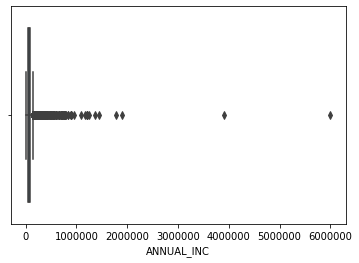

In [248]:
sns.boxplot(df4['ANNUAL_INC'])
plt.show()

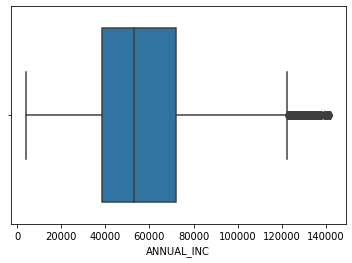

In [247]:
sns.boxplot(df5['ANNUAL_INC'])
plt.show()

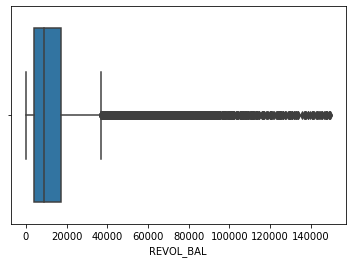

In [249]:
sns.boxplot(df4['REVOL_BAL'])
plt.show()

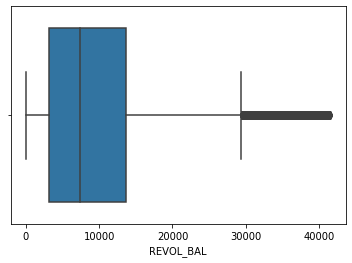

In [250]:
sns.boxplot(df5['REVOL_BAL'])
plt.show()

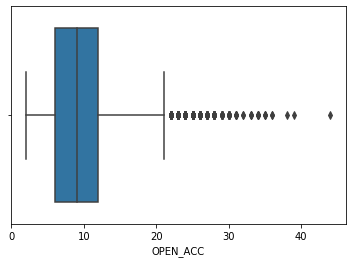

In [252]:
sns.boxplot(df4['OPEN_ACC'])
plt.show()

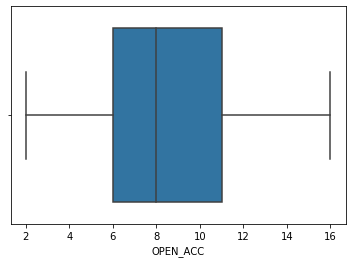

In [251]:
sns.boxplot(df5['OPEN_ACC'])
plt.show()

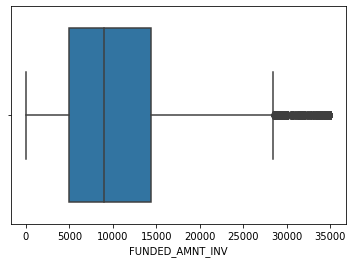

In [253]:
sns.boxplot(df4['FUNDED_AMNT_INV'])
plt.show()

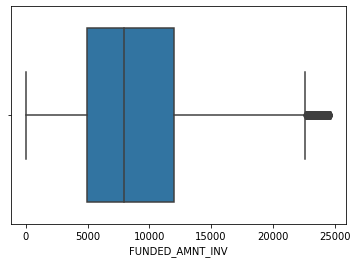

In [254]:
sns.boxplot(df5['FUNDED_AMNT_INV'])
plt.show()

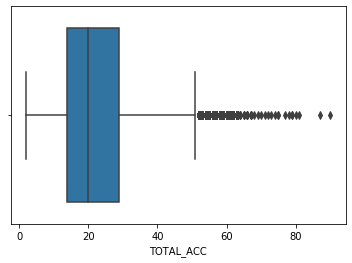

In [255]:
sns.boxplot(df4['TOTAL_ACC'])
plt.show()

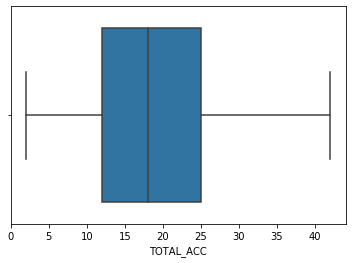

In [256]:
sns.boxplot(df5['TOTAL_ACC'])
plt.show()

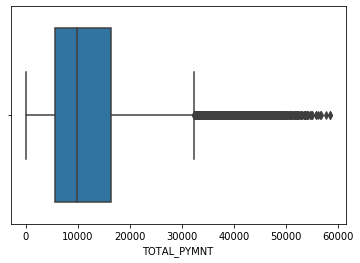

In [257]:
sns.boxplot(df4['TOTAL_PYMNT'])
plt.show()

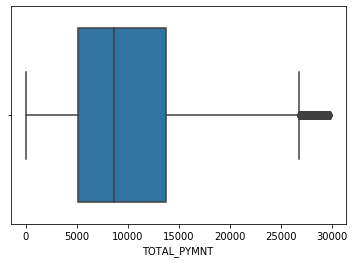

In [258]:
sns.boxplot(df5['TOTAL_PYMNT'])
plt.show()

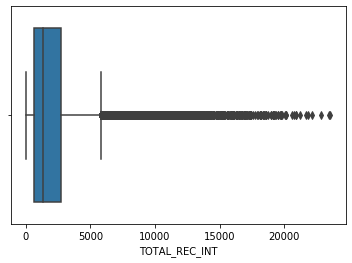

In [259]:
sns.boxplot(df4['TOTAL_REC_INT'])
plt.show()

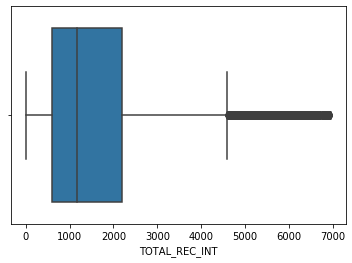

In [260]:
sns.boxplot(df5['TOTAL_REC_INT'])
plt.show()

# End of Outlier Treatment

# Feature Engineering

In [ ]:
""" Continuous features have values that are absolute numbers and trying to compare the absolute numbers with 
    "Defaulters" and "Non-defaulters" will be difficult and make no sense. Hence, we can segment these data-points
    within features such that each segments have data-points that are homogenous to eachother and the
    segments are heterogenous amongst eachother
     
    Post some research on lending, continuous features that are relevant to our studies and can be segmented 
    are as follows,
         1. 'LOAN_AMNT'
         2. 'INT_RATE'
         3. 'INSTALLMENT'
         4. 'ANNUAL_INC'
         5. 'DTI'
"""

In [433]:
df5[['LOAN_AMNT_SEGMENTS', 'INT_RATE_SEGMENTS', 'INSTALLMENT_SEGMENTS', 'ANNUAL_INC_SEGMENTS', 'DTI_SEGMENTS']].head()

,LOAN_AMNT_SEGMENTS,INT_RATE_SEGMENTS,INSTALLMENT_SEGMENTS,ANNUAL_INC_SEGMENTS,DTI_SEGMENTS
0,3000-8000,11-15,100-500,0-50000,20+
1,0-3000,15+,0-100,0-50000,0-10
2,0-3000,15+,0-100,0-50000,0-10
3,8000-18000,11-15,100-500,0-50000,10-20
5,3000-8000,5-10,100-500,0-50000,10-20


## 'LOAN_AMNT'

In [289]:
percentileChecks(df5, 'LOAN_AMNT')

0  Percentile =  725.0
1  Percentile =  1200.0
2  Percentile =  1500.0
3  Percentile =  1800.0
4  Percentile =  2000.0
5  Percentile =  2100.0
6  Percentile =  2400.0
7  Percentile =  2500.0
8  Percentile =  2800.0
9  Percentile =  3000.0
10  Percentile =  3000.0
11  Percentile =  3000.0
12  Percentile =  3300.0
13  Percentile =  3500.0
14  Percentile =  3600.0
15  Percentile =  4000.0
16  Percentile =  4000.0
17  Percentile =  4000.0
18  Percentile =  4153.499999999985
19  Percentile =  4400.0
20  Percentile =  4565.000000000009
21  Percentile =  4800.0
22  Percentile =  5000.0
23  Percentile =  5000.0
24  Percentile =  5000.0
25  Percentile =  5000.0
26  Percentile =  5000.0
27  Percentile =  5000.0
28  Percentile =  5200.0
29  Percentile =  5500.0
30  Percentile =  5600.0
31  Percentile =  6000.0
32  Percentile =  6000.0
33  Percentile =  6000.0
34  Percentile =  6000.0
35  Percentile =  6000.0
36  Percentile =  6075.0
37  Percentile =  6400.0
38  Percentile =  6500.0
39  Percentile

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [295]:
""" From the above percentile numbers, we can see 4 different segments, 
        1. Low loan amount = <=10 Percentile
        2. Low medium loan amount = >10 and <=50 Percentile
        3. High medium loan amount = >50 and <=90 Percentile
        4. High loan amount = >90 Percentile
"""

segments = [0, 3000, 8000, 18000, 50000]
segment_labels = ['0-3000', '3000-8000', '8000-18000', '18000+']
df5['LOAN_AMNT_SEGMENTS'] = pd.cut(df5['LOAN_AMNT'], segments, labels=segment_labels)
df5.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,LOAN_AMNT,FUNDED_AMNT,FUNDED_AMNT_INV,TERM,INT_RATE,INSTALLMENT,GRADE,SUB_GRADE,EMP_LENGTH,HOME_OWNERSHIP,ANNUAL_INC,VERIFICATION_STATUS,ISSUE_D,LOAN_STATUS,PURPOSE,ADDR_STATE,DTI,EARLIEST_CR_LINE,INQ_LAST_6MTHS,OPEN_ACC,REVOL_BAL,REVOL_UTIL,TOTAL_ACC,TOTAL_PYMNT,TOTAL_PYMNT_INV,TOTAL_REC_PRNCP,TOTAL_REC_INT,LAST_PYMNT_D,LAST_CREDIT_PULL_D,APPLICATION_TYPE,INT_RATE_SEGMENTS,FUNDED_AMNT_INV_SEGMENTS,LOAN_AMNT_SEGMENTS
0,5000.0,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,13648,83.70,9,5863.155187,5833.84,5000.00,863.16,Jan-15,May-16,INDIVIDUAL,6-15,2875-7984,3000-8000
1,2500.0,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,Apr-99,5,3,1687,9.40,4,1008.710000,1008.71,456.46,435.17,Apr-13,Sep-13,INDIVIDUAL,15+,0-2875,0-3000
2,2400.0,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Nov-01,2,2,2956,98.50,10,3005.666844,3005.67,2400.00,605.67,Jun-14,May-16,INDIVIDUAL,15+,0-2875,0-3000
3,10000.0,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,Feb-96,1,10,5598,21,37,12231.890000,12231.89,10000.00,2214.92,Jan-15,Apr-16,INDIVIDUAL,6-15,7984-16000,8000-18000
5,5000.0,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,Nov-04,3,9,7963,28.30,12,5632.210000,5632.21,5000.00,632.21,Jan-15,Jan-16,INDIVIDUAL,6-15,2875-7984,3000-8000


## 'INT_RATE'

In [291]:
percentileChecks(df5, 'INT_RATE')

0  Percentile =  5.42
1  Percentile =  5.42
2  Percentile =  5.79
3  Percentile =  5.99
4  Percentile =  6.03
5  Percentile =  6.17
6  Percentile =  6.539999999999999
7  Percentile =  6.619999999999999
8  Percentile =  6.76
9  Percentile =  6.91
10  Percentile =  6.99
11  Percentile =  7.14
12  Percentile =  7.29
13  Percentile =  7.4
14  Percentile =  7.49
15  Percentile =  7.51
16  Percentile =  7.51
17  Percentile =  7.51
18  Percentile =  7.68
19  Percentile =  7.88
20  Percentile =  7.88
21  Percentile =  7.9
22  Percentile =  7.9
23  Percentile =  8.49
24  Percentile =  8.59
25  Percentile =  8.88
26  Percentile =  8.9
27  Percentile =  9.25
28  Percentile =  9.47640000000003
29  Percentile =  9.63
30  Percentile =  9.88
31  Percentile =  9.91
32  Percentile =  9.99
33  Percentile =  10.0
34  Percentile =  10.25
35  Percentile =  10.36
36  Percentile =  10.37
37  Percentile =  10.38
38  Percentile =  10.59
39  Percentile =  10.65
40  Percentile =  10.71
41  Percentile =  10.75
42

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [311]:
""" From the above percentile numbers, we can have 3 segments as follows,
        1. Low interest = 5% - 10%
        2. Medium interest = 11% - 15%
        3. High interest = 15% +
"""
segments = [5, 10 , 15, 30]
segment_labels = ['5-10', '11-15', '15+']
df5['INT_RATE_SEGMENTS'] = pd.cut(df5['INT_RATE'], segments, labels=segment_labels)
df5.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LOAN_AMNT,FUNDED_AMNT,FUNDED_AMNT_INV,TERM,INT_RATE,INSTALLMENT,GRADE,SUB_GRADE,EMP_LENGTH,HOME_OWNERSHIP,ANNUAL_INC,VERIFICATION_STATUS,ISSUE_D,LOAN_STATUS,PURPOSE,ADDR_STATE,DTI,EARLIEST_CR_LINE,INQ_LAST_6MTHS,OPEN_ACC,REVOL_BAL,REVOL_UTIL,TOTAL_ACC,TOTAL_PYMNT,TOTAL_PYMNT_INV,TOTAL_REC_PRNCP,TOTAL_REC_INT,LAST_PYMNT_D,LAST_CREDIT_PULL_D,APPLICATION_TYPE,INT_RATE_SEGMENTS,LOAN_AMNT_SEGMENTS,INSTALLMENT_SEGMENTS,ANNUAL_INC_SEGMENTS,DTI_SEGMENTS
0,5000.0,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,13648,83.70,9,5863.155187,5833.84,5000.00,863.16,Jan-15,May-16,INDIVIDUAL,11-15,3000-8000,100-500,0-50000,20+
1,2500.0,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,Apr-99,5,3,1687,9.40,4,1008.710000,1008.71,456.46,435.17,Apr-13,Sep-13,INDIVIDUAL,15+,0-3000,0-100,0-50000,0-10
2,2400.0,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Nov-01,2,2,2956,98.50,10,3005.666844,3005.67,2400.00,605.67,Jun-14,May-16,INDIVIDUAL,15+,0-3000,0-100,0-50000,0-10
3,10000.0,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,Feb-96,1,10,5598,21,37,12231.890000,12231.89,10000.00,2214.92,Jan-15,Apr-16,INDIVIDUAL,11-15,8000-18000,100-500,0-50000,10-20
5,5000.0,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,Nov-04,3,9,7963,28.30,12,5632.210000,5632.21,5000.00,632.21,Jan-15,Jan-16,INDIVIDUAL,5-10,3000-8000,100-500,0-50000,10-20


## 'INSTALLMENT'

In [301]:
percentileChecks(df5, 'INSTALLMENT')

0  Percentile =  19.87
1  Percentile =  36.9576
2  Percentile =  48.2046
3  Percentile =  54.72
4  Percentile =  62.36
5  Percentile =  67.73
6  Percentile =  74.4338
7  Percentile =  80.1961
8  Percentile =  85.61040000000001
9  Percentile =  91.37839999999997
10  Percentile =  95.54800000000002
11  Percentile =  98.89590000000001
12  Percentile =  101.8
13  Percentile =  106.52980000000001
14  Percentile =  111.15
15  Percentile =  116.6445
16  Percentile =  121.36720000000001
17  Percentile =  124.71280000000006
18  Percentile =  129.05
19  Percentile =  132.59
20  Percentile =  136.49
21  Percentile =  140.4849
22  Percentile =  146.1
23  Percentile =  150.8658
24  Percentile =  154.21
25  Percentile =  156.41
26  Percentile =  159.59
27  Percentile =  162.73
28  Percentile =  165.23200000000003
29  Percentile =  168.09
30  Percentile =  170.87
31  Percentile =  174.08
32  Percentile =  179.54
33  Percentile =  183.1959
34  Percentile =  186.61
35  Percentile =  189.38
36  Percenti

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [302]:
""" From the above percentile numbers, we can have 3 segments as follows,
        1. Low  = 0 - 100
        2. Medium  = 101 - 500
        3. High  = 500 +
"""
segments = [0, 100, 500, 1000]
segment_labels = ['0-100', '100-500', '500+']
df5['INSTALLMENT_SEGMENTS'] = pd.cut(df5['INSTALLMENT'], segments, labels=segment_labels)
df5.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LOAN_AMNT,FUNDED_AMNT,FUNDED_AMNT_INV,TERM,INT_RATE,INSTALLMENT,GRADE,SUB_GRADE,EMP_LENGTH,HOME_OWNERSHIP,ANNUAL_INC,VERIFICATION_STATUS,ISSUE_D,LOAN_STATUS,PURPOSE,ADDR_STATE,DTI,EARLIEST_CR_LINE,INQ_LAST_6MTHS,OPEN_ACC,REVOL_BAL,REVOL_UTIL,TOTAL_ACC,TOTAL_PYMNT,TOTAL_PYMNT_INV,TOTAL_REC_PRNCP,TOTAL_REC_INT,LAST_PYMNT_D,LAST_CREDIT_PULL_D,APPLICATION_TYPE,INT_RATE_SEGMENTS,LOAN_AMNT_SEGMENTS,INSTALLMENT_SEGMENTS
0,5000.0,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,13648,83.70,9,5863.155187,5833.84,5000.00,863.16,Jan-15,May-16,INDIVIDUAL,6-15,3000-8000,100-500
1,2500.0,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,Apr-99,5,3,1687,9.40,4,1008.710000,1008.71,456.46,435.17,Apr-13,Sep-13,INDIVIDUAL,15+,0-3000,0-100
2,2400.0,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Nov-01,2,2,2956,98.50,10,3005.666844,3005.67,2400.00,605.67,Jun-14,May-16,INDIVIDUAL,15+,0-3000,0-100
3,10000.0,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,Feb-96,1,10,5598,21,37,12231.890000,12231.89,10000.00,2214.92,Jan-15,Apr-16,INDIVIDUAL,6-15,8000-18000,100-500
5,5000.0,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,Nov-04,3,9,7963,28.30,12,5632.210000,5632.21,5000.00,632.21,Jan-15,Jan-16,INDIVIDUAL,6-15,3000-8000,100-500


In [303]:
percentileChecks(df5, 'ANNUAL_INC')

0  Percentile =  4000.0
1  Percentile =  14400.0
2  Percentile =  18000.0
3  Percentile =  20000.0
4  Percentile =  21600.0
5  Percentile =  23400.0
6  Percentile =  24000.0
7  Percentile =  25000.0
8  Percentile =  26000.0
9  Percentile =  27012.839999999997
10  Percentile =  28157.800000000003
11  Percentile =  29388.720000000005
12  Percentile =  30000.0
13  Percentile =  30000.0
14  Percentile =  30996.0
15  Percentile =  32000.0
16  Percentile =  32576.160000000003
17  Percentile =  33600.0
18  Percentile =  34440.56
19  Percentile =  35000.0
20  Percentile =  35004.0
21  Percentile =  36000.0
22  Percentile =  36000.0
23  Percentile =  37000.0
24  Percentile =  38000.0
25  Percentile =  38400.0
26  Percentile =  39000.0
27  Percentile =  40000.0
28  Percentile =  40000.0
29  Percentile =  40000.0
30  Percentile =  40800.0
31  Percentile =  41982.251999999986
32  Percentile =  42000.0
33  Percentile =  42500.0
34  Percentile =  43192.80000000006
35  Percentile =  44000.0
36  Perce

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [304]:
""" From the above percentile numbers, we can have 3 segments as follows,
        1. Low  = 0 - 50000
        2. Medium  = 50000 - 100000
        3. High  = 100000 +
"""
segments = [0, 50000, 100000, 200000]
segment_labels = ['0-50000', '50000-100000', '100000+']
df5['ANNUAL_INC_SEGMENTS'] = pd.cut(df5['ANNUAL_INC'], segments, labels=segment_labels)
df5.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LOAN_AMNT,FUNDED_AMNT,FUNDED_AMNT_INV,TERM,INT_RATE,INSTALLMENT,GRADE,SUB_GRADE,EMP_LENGTH,HOME_OWNERSHIP,ANNUAL_INC,VERIFICATION_STATUS,ISSUE_D,LOAN_STATUS,PURPOSE,ADDR_STATE,DTI,EARLIEST_CR_LINE,INQ_LAST_6MTHS,OPEN_ACC,REVOL_BAL,REVOL_UTIL,TOTAL_ACC,TOTAL_PYMNT,TOTAL_PYMNT_INV,TOTAL_REC_PRNCP,TOTAL_REC_INT,LAST_PYMNT_D,LAST_CREDIT_PULL_D,APPLICATION_TYPE,INT_RATE_SEGMENTS,LOAN_AMNT_SEGMENTS,INSTALLMENT_SEGMENTS,ANNUAL_INC_SEGMENTS
0,5000.0,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,13648,83.70,9,5863.155187,5833.84,5000.00,863.16,Jan-15,May-16,INDIVIDUAL,6-15,3000-8000,100-500,0-50000
1,2500.0,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,Apr-99,5,3,1687,9.40,4,1008.710000,1008.71,456.46,435.17,Apr-13,Sep-13,INDIVIDUAL,15+,0-3000,0-100,0-50000
2,2400.0,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Nov-01,2,2,2956,98.50,10,3005.666844,3005.67,2400.00,605.67,Jun-14,May-16,INDIVIDUAL,15+,0-3000,0-100,0-50000
3,10000.0,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,Feb-96,1,10,5598,21,37,12231.890000,12231.89,10000.00,2214.92,Jan-15,Apr-16,INDIVIDUAL,6-15,8000-18000,100-500,0-50000
5,5000.0,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,Nov-04,3,9,7963,28.30,12,5632.210000,5632.21,5000.00,632.21,Jan-15,Jan-16,INDIVIDUAL,6-15,3000-8000,100-500,0-50000


## 'DTI'

In [305]:
percentileChecks(df5, 'DTI')

0  Percentile =  0.0
1  Percentile =  0.36
2  Percentile =  0.7746000000000004
3  Percentile =  1.2
4  Percentile =  1.65
5  Percentile =  2.01
6  Percentile =  2.413799999999999
7  Percentile =  2.8
8  Percentile =  3.16
9  Percentile =  3.5
10  Percentile =  3.833000000000002
11  Percentile =  4.17
12  Percentile =  4.45
13  Percentile =  4.75
14  Percentile =  5.04
15  Percentile =  5.33
16  Percentile =  5.59
17  Percentile =  5.88
18  Percentile =  6.16
19  Percentile =  6.4
20  Percentile =  6.65
21  Percentile =  6.9
22  Percentile =  7.16
23  Percentile =  7.41
24  Percentile =  7.66
25  Percentile =  7.86
26  Percentile =  8.07
27  Percentile =  8.3
28  Percentile =  8.51
29  Percentile =  8.75
30  Percentile =  8.95
31  Percentile =  9.17
32  Percentile =  9.38
33  Percentile =  9.58
34  Percentile =  9.79
35  Percentile =  10.02
36  Percentile =  10.23
37  Percentile =  10.43
38  Percentile =  10.64
39  Percentile =  10.82
40  Percentile =  11.04
41  Percentile =  11.25
42  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [306]:
""" From the above percentile numbers, we can have 3 segments as follows,
        1. Low  = 0 - 10
        2. Medium  = 10 - 20
        3. High  = 20 +
"""
segments = [0, 10, 20, 50]
segment_labels = ['0-10', '10-20', '20+']
df5['DTI_SEGMENTS'] = pd.cut(df5['DTI'], segments, labels=segment_labels)
df5.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LOAN_AMNT,FUNDED_AMNT,FUNDED_AMNT_INV,TERM,INT_RATE,INSTALLMENT,GRADE,SUB_GRADE,EMP_LENGTH,HOME_OWNERSHIP,ANNUAL_INC,VERIFICATION_STATUS,ISSUE_D,LOAN_STATUS,PURPOSE,ADDR_STATE,DTI,EARLIEST_CR_LINE,INQ_LAST_6MTHS,OPEN_ACC,REVOL_BAL,REVOL_UTIL,TOTAL_ACC,TOTAL_PYMNT,TOTAL_PYMNT_INV,TOTAL_REC_PRNCP,TOTAL_REC_INT,LAST_PYMNT_D,LAST_CREDIT_PULL_D,APPLICATION_TYPE,INT_RATE_SEGMENTS,LOAN_AMNT_SEGMENTS,INSTALLMENT_SEGMENTS,ANNUAL_INC_SEGMENTS,DTI_SEGMENTS
0,5000.0,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,13648,83.70,9,5863.155187,5833.84,5000.00,863.16,Jan-15,May-16,INDIVIDUAL,6-15,3000-8000,100-500,0-50000,20+
1,2500.0,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,Apr-99,5,3,1687,9.40,4,1008.710000,1008.71,456.46,435.17,Apr-13,Sep-13,INDIVIDUAL,15+,0-3000,0-100,0-50000,0-10
2,2400.0,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Nov-01,2,2,2956,98.50,10,3005.666844,3005.67,2400.00,605.67,Jun-14,May-16,INDIVIDUAL,15+,0-3000,0-100,0-50000,0-10
3,10000.0,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,Feb-96,1,10,5598,21,37,12231.890000,12231.89,10000.00,2214.92,Jan-15,Apr-16,INDIVIDUAL,6-15,8000-18000,100-500,0-50000,10-20
5,5000.0,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,Nov-04,3,9,7963,28.30,12,5632.210000,5632.21,5000.00,632.21,Jan-15,Jan-16,INDIVIDUAL,6-15,3000-8000,100-500,0-50000,10-20


In [322]:
# Cross checking if the segmentation has brought any missing values due to binning

missingValuesCheck(df5)

,columns,missing,pct_missing


# End of Feature Engineering

# Univariate, Bivariate and Mutilvariate Analysis

In [434]:
df5.LOAN_STATUS.value_counts(normalize=True)

Fully Paid     0.859946
Charged Off    0.140054
Name: LOAN_STATUS, dtype: float64

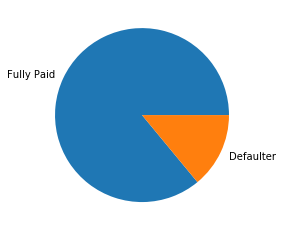

In [329]:
plt.pie(df5.LOAN_STATUS.value_counts(), labels=['Fully Paid', 'Defaulter'])
plt.show()

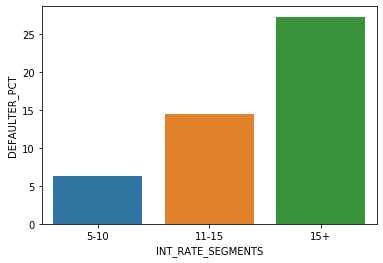

In [401]:
data = defaultPct('INT_RATE_SEGMENTS')
sns.barplot(data.INT_RATE_SEGMENTS, data.DEFAULTER_PCT)

""" We can clearly see below, higher the interest rate, higher are the defaulters %.
    Therefore, INT_RATE_SEGMENTS is a driver
"""

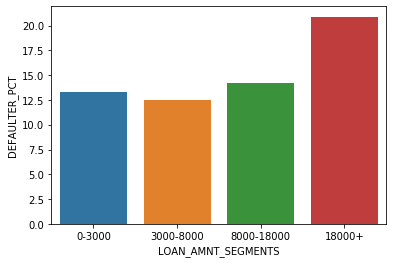

In [400]:
data = defaultPct('LOAN_AMNT_SEGMENTS')
sns.barplot(data.LOAN_AMNT_SEGMENTS, data.DEFAULTER_PCT)

""" We can clearly see below, higher the loan amount, higher are the defaulters %.
    Therefore, LOAN_AMNT_SEGMENTS is a driver
"""

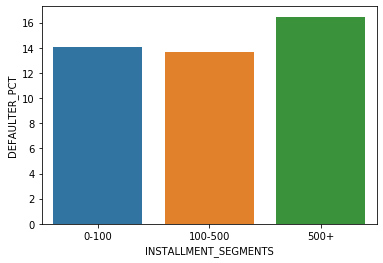

In [399]:
data = defaultPct('INSTALLMENT_SEGMENTS')
sns.barplot(data.INSTALLMENT_SEGMENTS, data.DEFAULTER_PCT)

""" We can clearly see below, higher the installment amount, higher are the defaulters %.
    Therefore, INSTALLMENT_SEGMENTS is a driver
"""

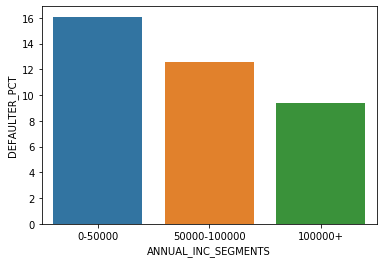

In [398]:
data = defaultPct('ANNUAL_INC_SEGMENTS')
sns.barplot(data.ANNUAL_INC_SEGMENTS, data.DEFAULTER_PCT)


""" We can clearly see below, lower the salary, higher are the defaulters %.
    Therefore, ANNUAL_INC_SEGMENTS is a driver
"""

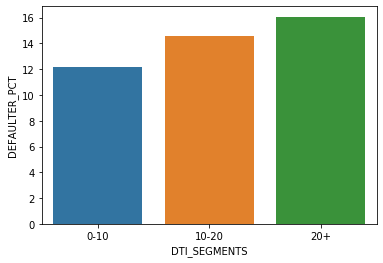

In [397]:
data = defaultPct('DTI_SEGMENTS')
sns.barplot(data.DTI_SEGMENTS, data.DEFAULTER_PCT)

""" We can clearly see below, if the debt is higher than the salary, higher are the defaulters %.
    Therefore, DTI_SEGMENTS is a driver
"""

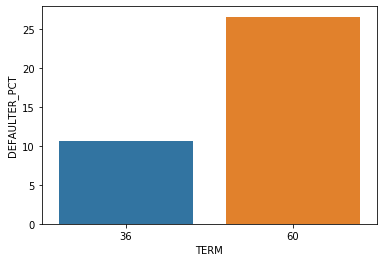

In [396]:
data = defaultPct('TERM')
sns.barplot(data.TERM, data.DEFAULTER_PCT)

""" We can clearly see below, higher the term, higher are the defaulters %.
    Therefore, TERM is a driver
"""

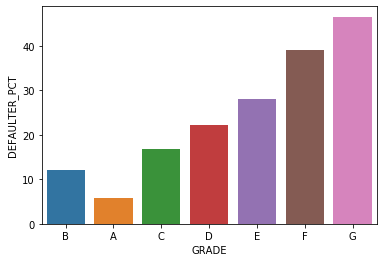

In [395]:
data = defaultPct('GRADE')
sns.barplot(data.GRADE, data.DEFAULTER_PCT)

""" We can clearly see below, higher the grade, higher are the defaulters %.
    Therefore, GRADE is a driver
"""

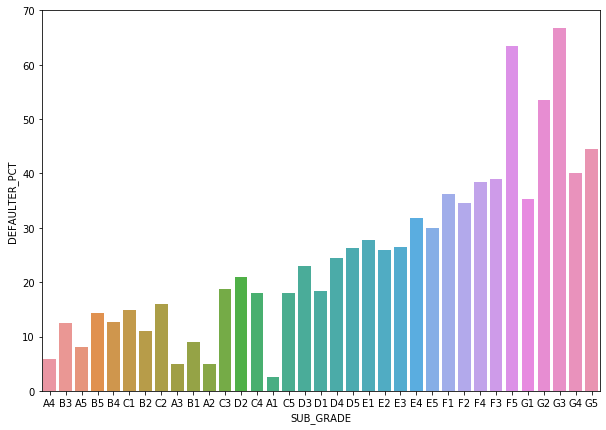

In [394]:
data = defaultPct('SUB_GRADE')
plt.figure(figsize=(10,7))
sns.barplot(data.SUB_GRADE, data.DEFAULTER_PCT)


""" We can clearly see below, higher the sub_grade, higher are the defaulters %.
    Therefore, SUB_GRADE is a driver
"""

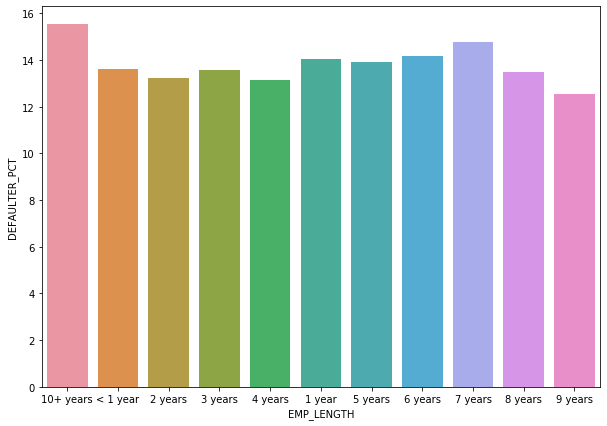

In [402]:
data = defaultPct('EMP_LENGTH')
plt.figure(figsize=(10,7))
sns.barplot(data.EMP_LENGTH, data.DEFAULTER_PCT)

""" We can clearly see below, there is not much variation between the EMP_LENGTH
    Therefore, EMP_LENGTH is not a driver
"""

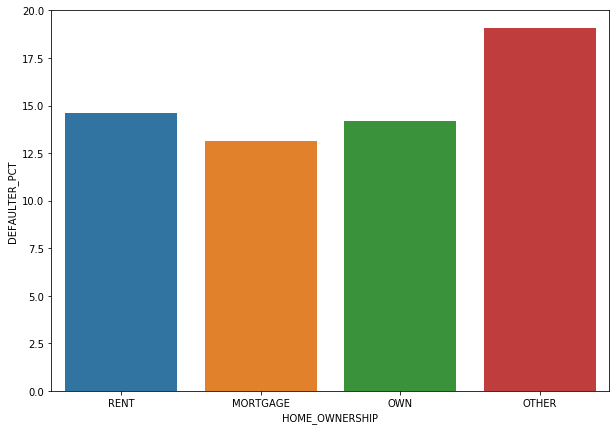

In [403]:
data = defaultPct('HOME_OWNERSHIP')
plt.figure(figsize=(10,7))
sns.barplot(data.HOME_OWNERSHIP, data.DEFAULTER_PCT)

""" We can clearly see below, we can see that 'OTHER' have higher defaulters
    Therefore, HOME_OWNERSHIP is a driver
"""

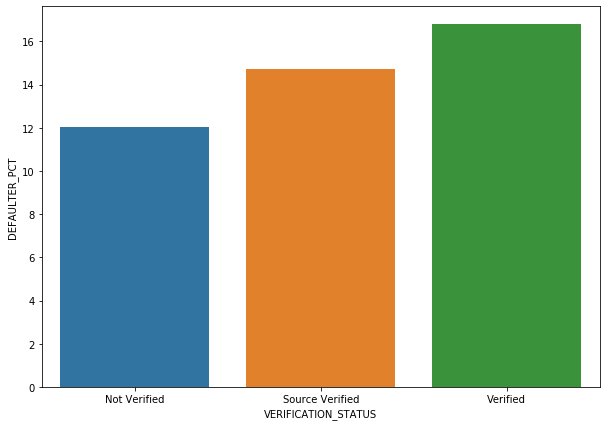

In [404]:
data = defaultPct('VERIFICATION_STATUS')
plt.figure(figsize=(10,7))
sns.barplot(data.VERIFICATION_STATUS, data.DEFAULTER_PCT)

""" We can clearly see below, verfied segments have higher defaulters 
    Therefore, VERIFICATION_STATUS is a driver
"""

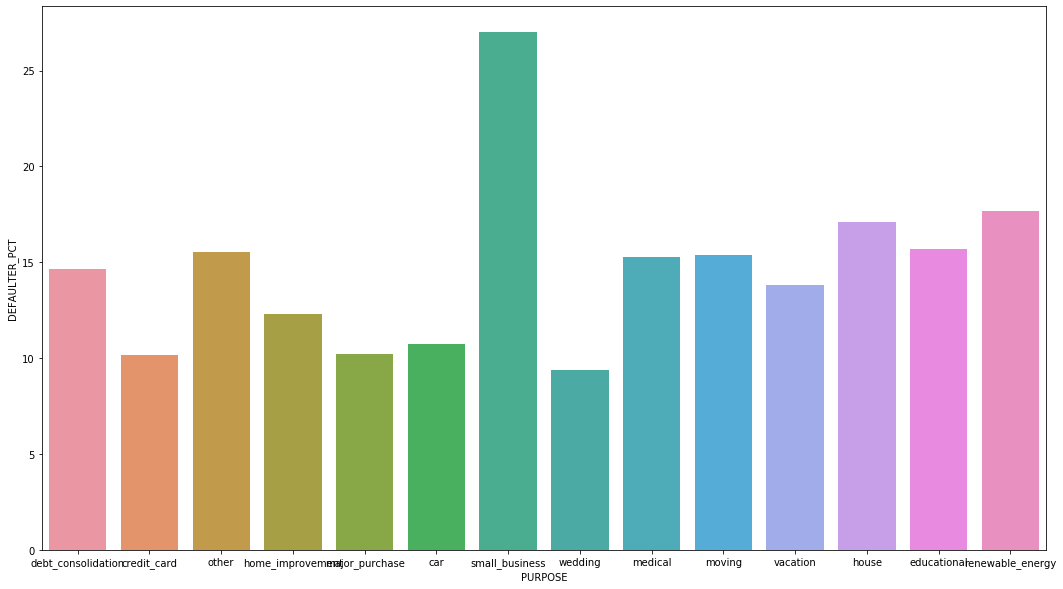

In [409]:
data = defaultPct('PURPOSE')
plt.figure(figsize=(18,10))
sns.barplot(data.PURPOSE, data.DEFAULTER_PCT, )

""" We can clearly see below,small businesses have higher defaulters 
    Therefore, PURPOSE is a driver
"""

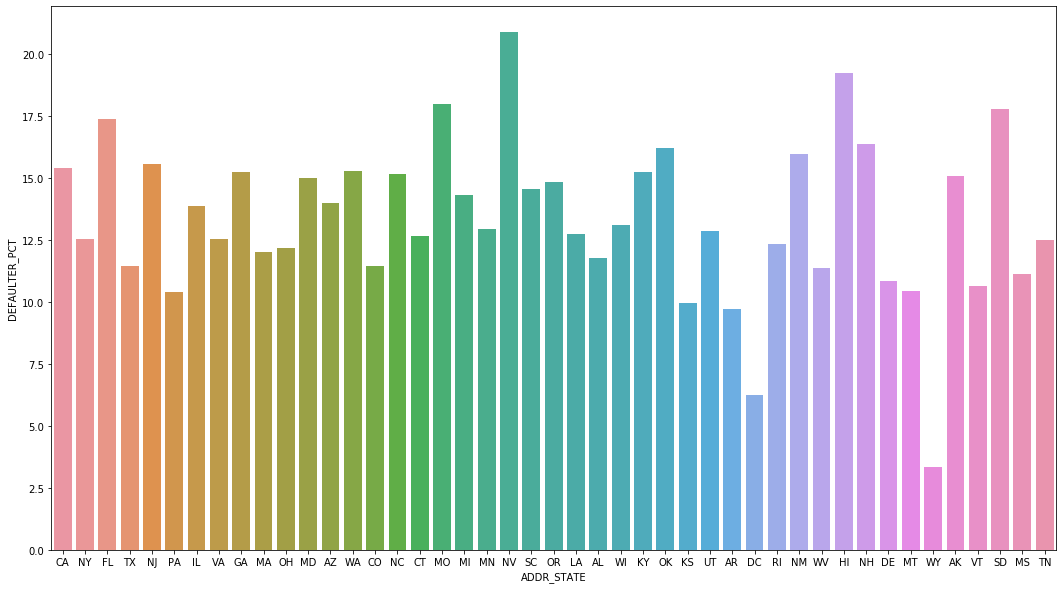

In [425]:
data = defaultPct('ADDR_STATE')
plt.figure(figsize=(18,10))
sns.barplot(data.ADDR_STATE, data.DEFAULTER_PCT)


""" We can clearly see below, states have constant variations
    Therefore, ADDR_STATE is not a driver
"""

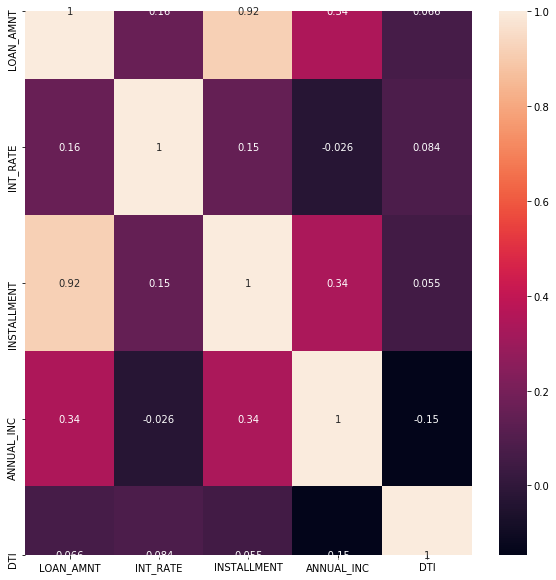

In [422]:
plt.figure(figsize=(10,10))
sns.heatmap(df5[['LOAN_AMNT', 'INT_RATE', 'INSTALLMENT', 'ANNUAL_INC', 'DTI']].corr(), annot = True)

# From the above EDA, we can infer that the drivers for loan defaulting are as follows,
        1. INT_RATE
        2. LOAN_AMNT
        3. DTI
        4. ANNUAL_INC
        5. GRADE
        6. TERM
        
        The above list are the key drivers, whereas, the below list are also good drivers but should be looked at post 
        the above key drivers
        
        7. PURPOSE
        8. INSTALLMENT
        9. SUB_GRADE
        10. HOME_OWNERSHIP
        11. VERIFICATION_STATUS